# **Logistic regression**

This regression is a **supervised machine learning algorithm** used for classification. Unlike linear regression that predicts a numerical continuous variable, this algorithm predicts the probability than an input belongs to a specific class. It is used for binary classification where the output can be one of two possible categories (Approved - failed, Risk - No risk, True - False, 0 - 1). It uses the sigmoid function to convert inputs into a probability with value between 0 and 1.


## **Types of logistic regression**
The logistic regression can be classified into three main types:
1. **Binomial logistic regression:** Used when the target variable only has to possible categories (1 or 0).
2. **Multinomial logistic regression:** Used when the target variable has three or more possible categories that are not ordered (cat, dog, sheep, bird).
3. **Ordinal logistic regression:** Used when the target variable has three or more categories with natural order or raking (Low, Medium, High) since it takes the order of the categories when modeling.

## **Understanding the sigmoid function**

This function takes any real number and maps it into the range 0 to 1 forming an "S" shaped curve called the sigmoid curve or logistic curve. Because probabilities must lie between 0 and 1, the sigmoid function is perfect for this purpose.  In logistic regression, we use a threshold value usually 0.5 to decide the class label.

- If the sigmoid output is same or above the threshold, the input is classified as Class 1.
- If it is below the threshold, the input is classified as Class 0.
- The threshold can be adjusted as needed to improve the model accuracy.

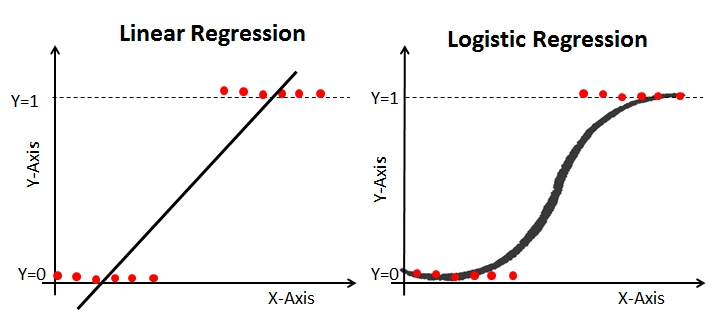


The logistic regression transforms the linear regression function continuous value output into categorical value output using the sigmoid function. This is also known as the logistic function.

Suppose you have input features represented in a matrix:

$$ X=\begin{bmatrix}
X_{11} & ... & X_{1m} \\
X_{21} & ... & X_{2m}\\
​\vdots  & \ddots  & ​\vdots  \\
X_{n1} & ... & X_{nm}
\end{bmatrix} $$

And the target variable only with binary outputs:

$$ Y = \left\{ \begin{array}{cl}
1 & : \ \text{If class 1} \\
0 & : \ \text{If class 2}
\end{array} \right. $$

Then, apply the multi-linear function to the input variables X

$$ z = (\sum_{i = 1}^{n}w_ix_i)+b $$

where $x$ is the $i_{th}$ obserbation of X, and $w_i = [w_1,w_2,w_3,.....,w_m]$ are the weights or coefficient and $b$ is the bias term, also known as the intercept. This equation can be represented as the dot product of weight and bias:

$$ z = w * X + b $$

All of this process is made to complete a linear transformation in $X_{i}$. Even though $z$ is still a numeric value, its made for the model to gather information since its a weighted sum of the characteristics. 
- If $z$ is big and possitive, the model has linear evidence that lead strongly that the class should be 1.
- If $z$ is big and negative, the model has linear evidence that lead strongly that the class should be 0.
- If $z$ is near to zero, it has ambiguous information, since its near the threshold of decision.

Up to this point, $z$ is a continuous value from the linear regression. Now, the sigmoid function is applied to find the probability between 0 and 1:

$$ σ(z)= \frac{1}{1+e^{-z}}$$

This sigmoid function converts the continuous numerical variable $z$ into a probability between 0 and 1.

- $σ(z)$ tends towards 1 as $z \to  \infty $
- $σ(z)$ tends towards 0 as $z \to - \infty $

Where the probability of a class can be measured as:

- $P(y = 1) = σ(z)$
- $P(y = 0) = 1- σ(z)$


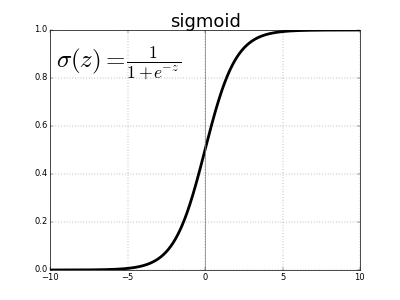

### Logistic regression equation and odds:
It models the odds of the dependent event occurring which is the ratio of the probability of the event to the probability of it not occurring:

$$ \frac{p(x)}{1-p(x)} = e^{z}$$

after replacing $z$, the final logistic regression equation will be:

$$p(x) = \frac{e^{w*X + b}}{1 + e^{w*X + b}}$$

$$P(X;b,w) = \frac{e^{w*X+b}}{1+e^{w*X+b}} = \frac{1}{1+e^{w*X+b}}$$

This formula represents the probability of the input belonging to class 1. This is the sigmoid function applied to the logistic regression.

Now the goal is to find the weights $w$ and the bias $b$ that maximize the likelihood $(L)$ of observing the data.

$$L(b,w) = \prod_{i = 1}^{n}p(x_i)^{y_i}(1-p(x))^{1-y_i}$$

Taking the natural log on both sides, it is found what is known as the log-likelihood function:

$$log(L(b,w)) = \sum_{i = n}^{n}(y_i - p(x_i;b,w))x_{ij}$$

In order to find the best $w$ and $b$ we use the gradient ascent on the log-likelihood function. the gradient is respect to each weight:

$$\frac{\delta J(l(b,w))}{\delta w_j} = \sum_{n= i}^{n}(y_i - p(x_i;b,w))x_{ij}$$

### Cross Entropy

Now, what´s left if to define the cost function to maximize the log-likelihood (minimize loss). That´s when **cross entropy comes in**.

Fist, it´s important to understand Entropy. The Entropy calculates the degree of randomness or disorder within a system. The greater the value of entropy, the greater the uncertainity for the probability distribution, the smaller the value, the less uncertainity.

On the other hand, **cross entropy**, also know as the *logarithmic loss* is a popular loss function that measures the performance of the classification model. Cross-entropy measures the difference between the discovered probability distribution of a classification model and the predicted values. The cross entropy function is used to find the optimal solution by adjusting weights of a machine learning model. A lower cross entropy value indicates better performance.




In machine learning, this function allows to determine how wrong the model is and to correct itself based on that wrongness. In addition, the measure of error from a loss function serves as a guide during the optimization process by giving feedback to the model on how well it fits the data. For that reason, most machine learning models use a loss function during the optimization process. The smaller the error, the better the model.

In classification, the binary cross-entropy function is:

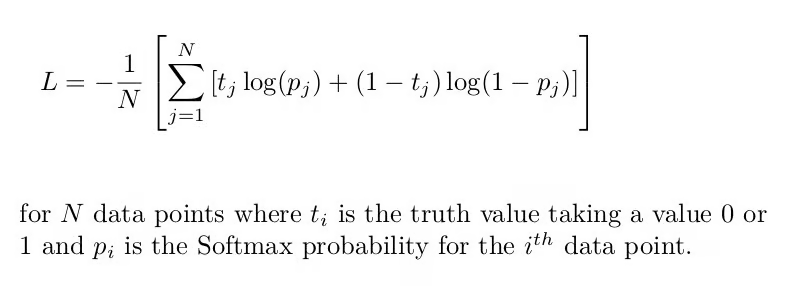

If we were to calculate the loss of a single data point where the correct value is y=1, the equation would look like this:

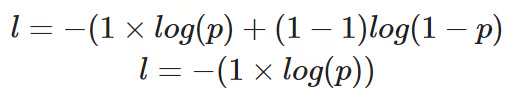


In this case, the cross entropy function is used to find the optimum values of w and b, hence, the equation is the following:

$$J(\mathbf{w}, b) = - \frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{P}_i) + (1 - y_i) \log(1 - \hat{P}_i) \right]$$

where $\hat{P}_i = P(x_i; b, w)$ is the predicted probability.

In a logistic regression there is no way to find the optimun solution in a closed way, furthermore, the only path to find it is to complete an iterative process like the **gradient decent**. In this function, we update the paremeters w and b moving the opposite way as the gradient. In order to implement this step, is needed to load a dataset and perform all of the previous steps

## **Creating the logistic regression**

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating a simple logistic regression dataset using pandas

data = {
    'Feature1': [2.5, 3.6, 1.2, 4.5, 3.3, 5.1, 6.2, 7.4, 5.5, 8.0, 9.1, 10.2, 8.5, 11.0, 12.3, 13.5, 14.1, 15.6, 16.2, 17.8],
    'Feature2': [1.0, 2.1, 0.5, 3.3, 2.8, 4.0, 5.5, 6.1, 4.8, 7.2, 8.3, 9.0, 7.5, 10.1, 11.4, 12.0, 13.2, 14.5, 15.0, 16.3],
    'Label': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)
display(df)



,Feature1,Feature2,Label
0,2.5,1.0,0
1,3.6,2.1,0
2,1.2,0.5,0
3,4.5,3.3,0
4,3.3,2.8,0
5,5.1,4.0,1
6,6.2,5.5,1
7,7.4,6.1,1
8,5.5,4.8,1
9,8.0,7.2,1


## Creating the sigmoid function

In [4]:
# Extracting the features and labels as np arrays
X = df[['Feature1', 'Feature2']].values
y = df['Label'].values

In [9]:
n, m = X.shape 
y = y.reshape(n, 1) # reshape y to be a column vector
print(f"Number of observations (n): {n}")
print(f"Number of features (m): {m}")

Number of observations (n): 20
Number of features (m): 2


First, we initialize the dimentions of the *weights* and the *bias*

In [10]:
w = np.zeros((m, 1)) # weights initialization
b = 0.0 # bias initialization

In [ ]:
z = np.dot(X, w) + b
sigmoid = 1 / (1 + np.exp(-z))

print(sigmoid)

[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]


Since the weights and the bias were initialized on Zero, all the $z$ vector has a value of 0.5.

Now, the optimization is made: